In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams

plt.style.use("ggplot")
rcParams["figure.figsize"] = [15, 6]
rcParams["xtick.labelsize"] = 12
rcParams["ytick.labelsize"] = 12
rcParams["font.size"] = 15

warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')
train_data.head()

engine_no  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
0          0               1       25.0074        0.6200          60.0   
1          0               2       35.0072        0.8413         100.0   
2          0               3       25.0053        0.6215          60.0   
3          0               4       42.0045        0.8407         100.0   
4          0               5       35.0046        0.8400         100.0   

   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_18  \
0    462.54    536.84   1256.52   1043.97      7.05  ...       1915   
1    449.44    555.44   1364.42   1128.75      5.48  ...       2223   
2    462.54    536.42   1265.94   1047.23      7.05  ...       1915   
3    445.00    549.41   1355.52   1115.81      3.91  ...       2212   
4    449.44    555.21   1361.04   1123.63      5.48  ...       2223   

   sensor_19  sensor_20  sensor_21  sensor_22  sensor_23  sensor_24  \
0      84.93      14.35     8.4712        NaN        NaN        NaN   
1     100.00      14.88     8.9928        NaN        NaN        NaN   
2      84.93      14.21     8.5107        NaN        NaN        NaN   
3     100.00      10.63     6.4578        NaN        NaN        NaN   
4     100.00      14.95     9.0279        NaN        NaN        NaN   

   sensor_25  sensor_26  sensor_27  
0        NaN        NaN        NaN  
1        NaN        NaN        NaN  
2        NaN        NaN        NaN  
3        NaN        NaN        NaN  
4        NaN        NaN        NaN  

[5 rows x 32 columns]

In [3]:
test_data.head()

engine_no  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
0          0               1       42.0034        0.8400         100.0   
1          0               2       42.0017        0.8400         100.0   
2          0               3        0.0028        0.0019         100.0   
3          0               4       42.0047        0.8400         100.0   
4          0               5       10.0058        0.2506         100.0   

   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_18  \
0    445.00    549.36   1342.05   1124.56      3.91  ...       2212   
1    445.00    548.83   1351.93   1116.28      3.91  ...       2212   
2    518.67    642.35   1583.74   1400.44     14.62  ...       2388   
3    445.00    549.69   1354.36   1125.55      3.91  ...       2212   
4    489.05    604.72   1496.65   1310.52     10.52  ...       2319   

   sensor_19  sensor_20  sensor_21  sensor_22  sensor_23  sensor_24  \
0      100.0      10.69     6.3956        NaN        NaN        NaN   
1      100.0      10.55     6.3775        NaN        NaN        NaN   
2      100.0      38.85    23.3483        NaN        NaN        NaN   
3      100.0      10.56     6.4871        NaN        NaN        NaN   
4      100.0      28.78    17.1987        NaN        NaN        NaN   

   sensor_25  sensor_26  sensor_27  
0        NaN        NaN        NaN  
1        NaN        NaN        NaN  
2        NaN        NaN        NaN  
3        NaN        NaN        NaN  
4        NaN        NaN        NaN  

[5 rows x 32 columns]

In [4]:
train_max_df = train_data.groupby('engine_no').agg({'time_in_cycles':'max'})
test_max_df = test_data.groupby('engine_no').agg({'time_in_cycles':'max'})
train_max_df.head()

time_in_cycles
engine_no                
0                     340
1                     322
2                     161
3                     253
4                     184

In [5]:
test_max_df.head()

time_in_cycles
engine_no                
0                     260
1                     186
2                     206
3                     135
4                     135

In [6]:
def add_remaining_useful_life(df, max_df):
    
    # Get the total number of cycles for each unit
    max_cycle= max_df['time_in_cycles']
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='engine_no', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_in_cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

In [7]:
train_data = add_remaining_useful_life(train_data,train_max_df)
test_data = add_remaining_useful_life(test_data,test_max_df)

In [8]:
train_data.head()

engine_no  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
0          0               1       25.0074        0.6200          60.0   
1          0               2       35.0072        0.8413         100.0   
2          0               3       25.0053        0.6215          60.0   
3          0               4       42.0045        0.8407         100.0   
4          0               5       35.0046        0.8400         100.0   

   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_19  \
0    462.54    536.84   1256.52   1043.97      7.05  ...      84.93   
1    449.44    555.44   1364.42   1128.75      5.48  ...     100.00   
2    462.54    536.42   1265.94   1047.23      7.05  ...      84.93   
3    445.00    549.41   1355.52   1115.81      3.91  ...     100.00   
4    449.44    555.21   1361.04   1123.63      5.48  ...     100.00   

   sensor_20  sensor_21  sensor_22  sensor_23  sensor_24  sensor_25  \
0      14.35     8.4712        NaN        NaN        NaN        NaN   
1      14.88     8.9928        NaN        NaN        NaN        NaN   
2      14.21     8.5107        NaN        NaN        NaN        NaN   
3      10.63     6.4578        NaN        NaN        NaN        NaN   
4      14.95     9.0279        NaN        NaN        NaN        NaN   

   sensor_26  sensor_27  RUL  
0        NaN        NaN  339  
1        NaN        NaN  338  
2        NaN        NaN  337  
3        NaN        NaN  336  
4        NaN        NaN  335  

[5 rows x 33 columns]

In [9]:
train_data_0 = train_data[train_data['engine_no']==0]
train_data_0.head()

engine_no  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
0          0               1       25.0074        0.6200          60.0   
1          0               2       35.0072        0.8413         100.0   
2          0               3       25.0053        0.6215          60.0   
3          0               4       42.0045        0.8407         100.0   
4          0               5       35.0046        0.8400         100.0   

   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_19  \
0    462.54    536.84   1256.52   1043.97      7.05  ...      84.93   
1    449.44    555.44   1364.42   1128.75      5.48  ...     100.00   
2    462.54    536.42   1265.94   1047.23      7.05  ...      84.93   
3    445.00    549.41   1355.52   1115.81      3.91  ...     100.00   
4    449.44    555.21   1361.04   1123.63      5.48  ...     100.00   

   sensor_20  sensor_21  sensor_22  sensor_23  sensor_24  sensor_25  \
0      14.35     8.4712        NaN        NaN        NaN        NaN   
1      14.88     8.9928        NaN        NaN        NaN        NaN   
2      14.21     8.5107        NaN        NaN        NaN        NaN   
3      10.63     6.4578        NaN        NaN        NaN        NaN   
4      14.95     9.0279        NaN        NaN        NaN        NaN   

   sensor_26  sensor_27  RUL  
0        NaN        NaN  339  
1        NaN        NaN  338  
2        NaN        NaN  337  
3        NaN        NaN  336  
4        NaN        NaN  335  

[5 rows x 33 columns]

In [10]:
train_data['increasing']=train_data['sensor_2']+ train_data['sensor_3']+ train_data['sensor_4']+train_data['sensor_8']+train_data['sensor_13']+ train_data['sensor_15']+train_data['sensor_17']

In [11]:
train_data.head()

engine_no  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
0          0               1       25.0074        0.6200          60.0   
1          0               2       35.0072        0.8413         100.0   
2          0               3       25.0053        0.6215          60.0   
3          0               4       42.0045        0.8407         100.0   
4          0               5       35.0046        0.8400         100.0   

   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_20  \
0    462.54    536.84   1256.52   1043.97      7.05  ...      14.35   
1    449.44    555.44   1364.42   1128.75      5.48  ...      14.88   
2    462.54    536.42   1265.94   1047.23      7.05  ...      14.21   
3    445.00    549.41   1355.52   1115.81      3.91  ...      10.63   
4    449.44    555.21   1361.04   1123.63      5.48  ...      14.95   

   sensor_21  sensor_22  sensor_23  sensor_24  sensor_25  sensor_26  \
0     8.4712        NaN        NaN        NaN        NaN        NaN   
1     8.9928        NaN        NaN        NaN        NaN        NaN   
2     8.5107        NaN        NaN        NaN        NaN        NaN   
3     6.4578        NaN        NaN        NaN        NaN        NaN   
4     9.0279        NaN        NaN        NaN        NaN        NaN   

   sensor_27  RUL  increasing  
0        NaN  339   7098.0650  
1        NaN  338   8003.1227  
2        NaN  337   7111.3854  
3        NaN  336   7961.2434  
4        NaN  335   7994.4987  

[5 rows x 34 columns]

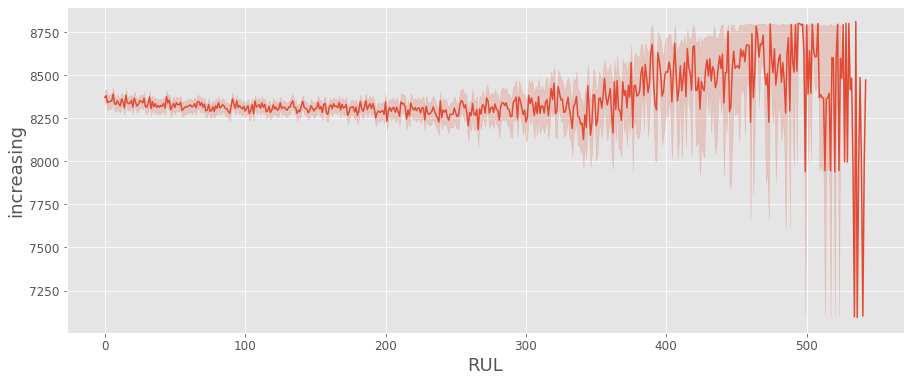

In [12]:
 sns.lineplot(train_data['RUL'], train_data['increasing'])

In [95]:
# train_data.columns[2:-2].tolist()

In [93]:
x_feature = ['RUL']
y_feature = train_data.columns[2:-2].tolist()

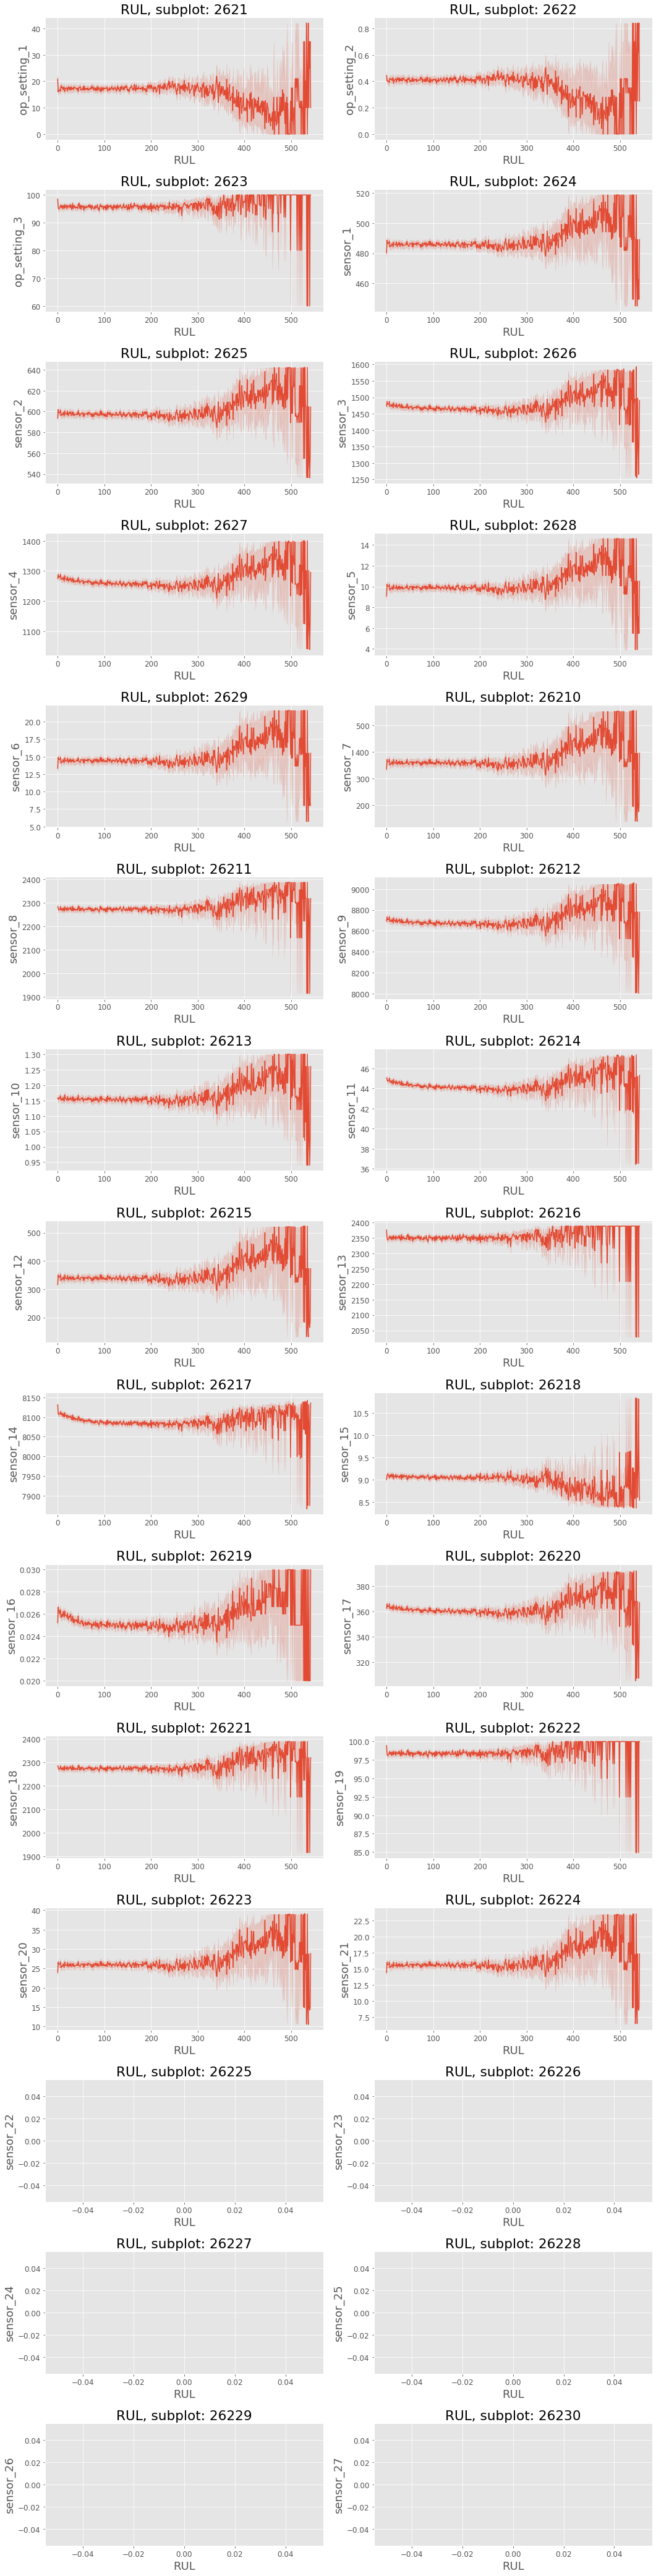

In [94]:
a = 26
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in y_feature:
    for j in x_feature:
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.lineplot(train_data[i], train_data[j])
        c = c + 1

plt.tight_layout()
plt.show();

In [96]:
train_data_5 = train_data[train_data['engine_no']==5]
train_data_5.head()

engine_no  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
1260          5               1        0.0018        0.0001         100.0   
1261          5               2       -0.0004        0.0003         100.0   
1262          5               3       -0.0021       -0.0005         100.0   
1263          5               4        0.0020        0.0000         100.0   
1264          5               5       -0.0002       -0.0005         100.0   

      sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_20  \
1260    518.67    642.48   1582.06   1409.01     14.62  ...      38.79   
1261    518.67    642.77   1586.79   1403.57     14.62  ...      39.03   
1262    518.67    642.24   1589.20   1404.16     14.62  ...      38.74   
1263    518.67    642.47   1591.55   1401.62     14.62  ...      38.85   
1264    518.67    642.42   1592.27   1404.57     14.62  ...      38.88   

      sensor_21  sensor_22  sensor_23  sensor_24  sensor_25  sensor_26  \
1260    23.3565        NaN        NaN        NaN        NaN        NaN   
1261    23.4511        NaN        NaN        NaN        NaN        NaN   
1262    23.3475        NaN        NaN        NaN        NaN        NaN   
1263    23.1926        NaN        NaN        NaN        NaN        NaN   
1264    23.2158        NaN        NaN        NaN        NaN        NaN   

      sensor_27  RUL  increasing  
1260        NaN  171   8811.1413  
1261        NaN  170   8809.7791  
1262        NaN  169   8813.1443  
1263        NaN  168   8810.2320  
1264        NaN  167   8816.8479  

[5 rows x 34 columns]

In [118]:
x_feature = ['time_in_cycles']
y_feature = train_data_5.columns[2:-2].tolist()

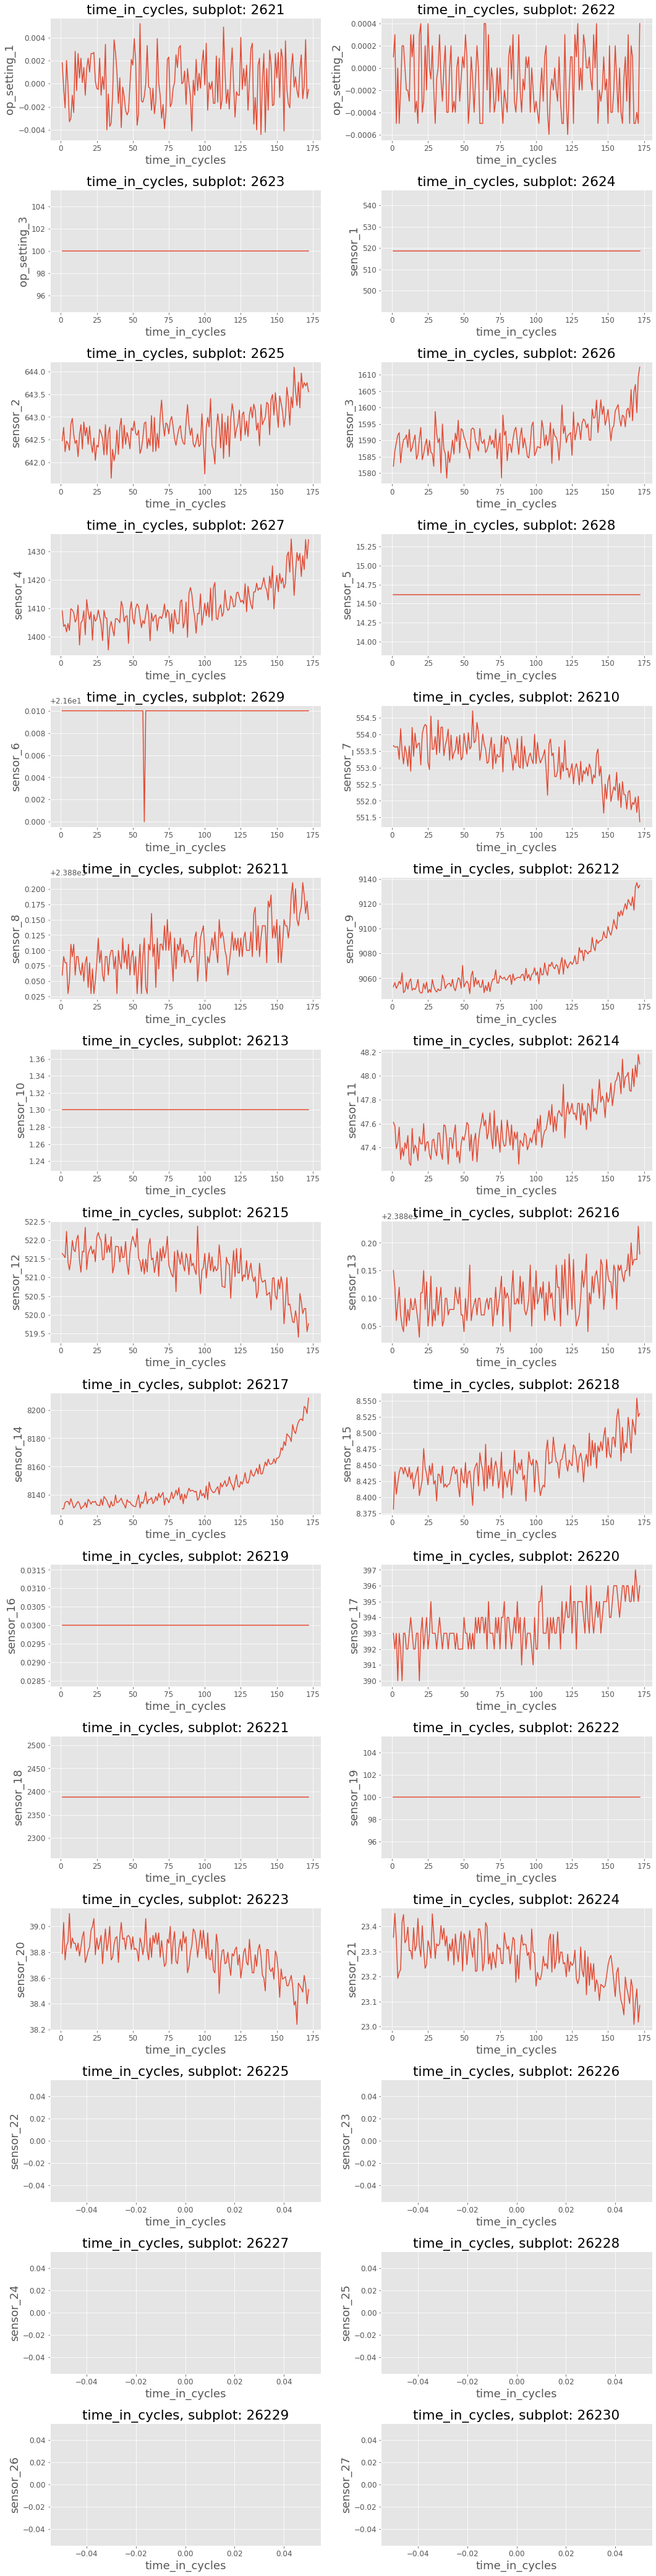

In [119]:
a = 26
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in x_feature:
    for j in y_feature:
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.lineplot(train_data_5[i], train_data_5[j])
        c = c + 1

plt.tight_layout()
plt.show();

In [115]:
train_data_5[['sensor_2','RUL']].corr()

sensor_2       RUL
sensor_2  1.000000 -0.617016
RUL      -0.617016  1.000000

In [117]:
train_data_5[['sensor_2','time_in_cycles']].corr()

sensor_2  time_in_cycles
sensor_2        1.000000        0.617016
time_in_cycles  0.617016        1.000000

In [123]:
train_data_14 = train_data[train_data['engine_no']==22]
train_data_14.head()

engine_no  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
4813         22               1       -0.0015       -0.0001         100.0   
4814         22               2       -0.0002        0.0002         100.0   
4815         22               3        0.0007        0.0002         100.0   
4816         22               4       -0.0031        0.0004         100.0   
4817         22               5        0.0002       -0.0002         100.0   

      sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_20  \
4813    518.67    642.38   1586.97   1394.22     14.62  ...      38.97   
4814    518.67    641.70   1579.36   1403.54     14.62  ...      38.95   
4815    518.67    642.25   1585.72   1401.08     14.62  ...      39.09   
4816    518.67    641.77   1585.38   1399.96     14.62  ...      39.04   
4817    518.67    642.44   1589.74   1402.81     14.62  ...      38.94   

      sensor_21  sensor_22  sensor_23  sensor_24  sensor_25  sensor_26  \
4813    23.4138        NaN        NaN        NaN        NaN        NaN   
4814    23.4826        NaN        NaN        NaN        NaN        NaN   
4815    23.4793        NaN        NaN        NaN        NaN        NaN   
4816    23.4577        NaN        NaN        NaN        NaN        NaN   
4817    23.3407        NaN        NaN        NaN        NaN        NaN   

      sensor_27  RUL  increasing  
4813        NaN  340   8798.0098  
4814        NaN  339   8801.1272  
4815        NaN  338   8804.5439  
4816        NaN  337   8803.5725  
4817        NaN  336   8811.4235  

[5 rows x 34 columns]

In [124]:
x_feature = ['time_in_cycles']
y_feature = train_data_14.columns[2:-2].tolist()

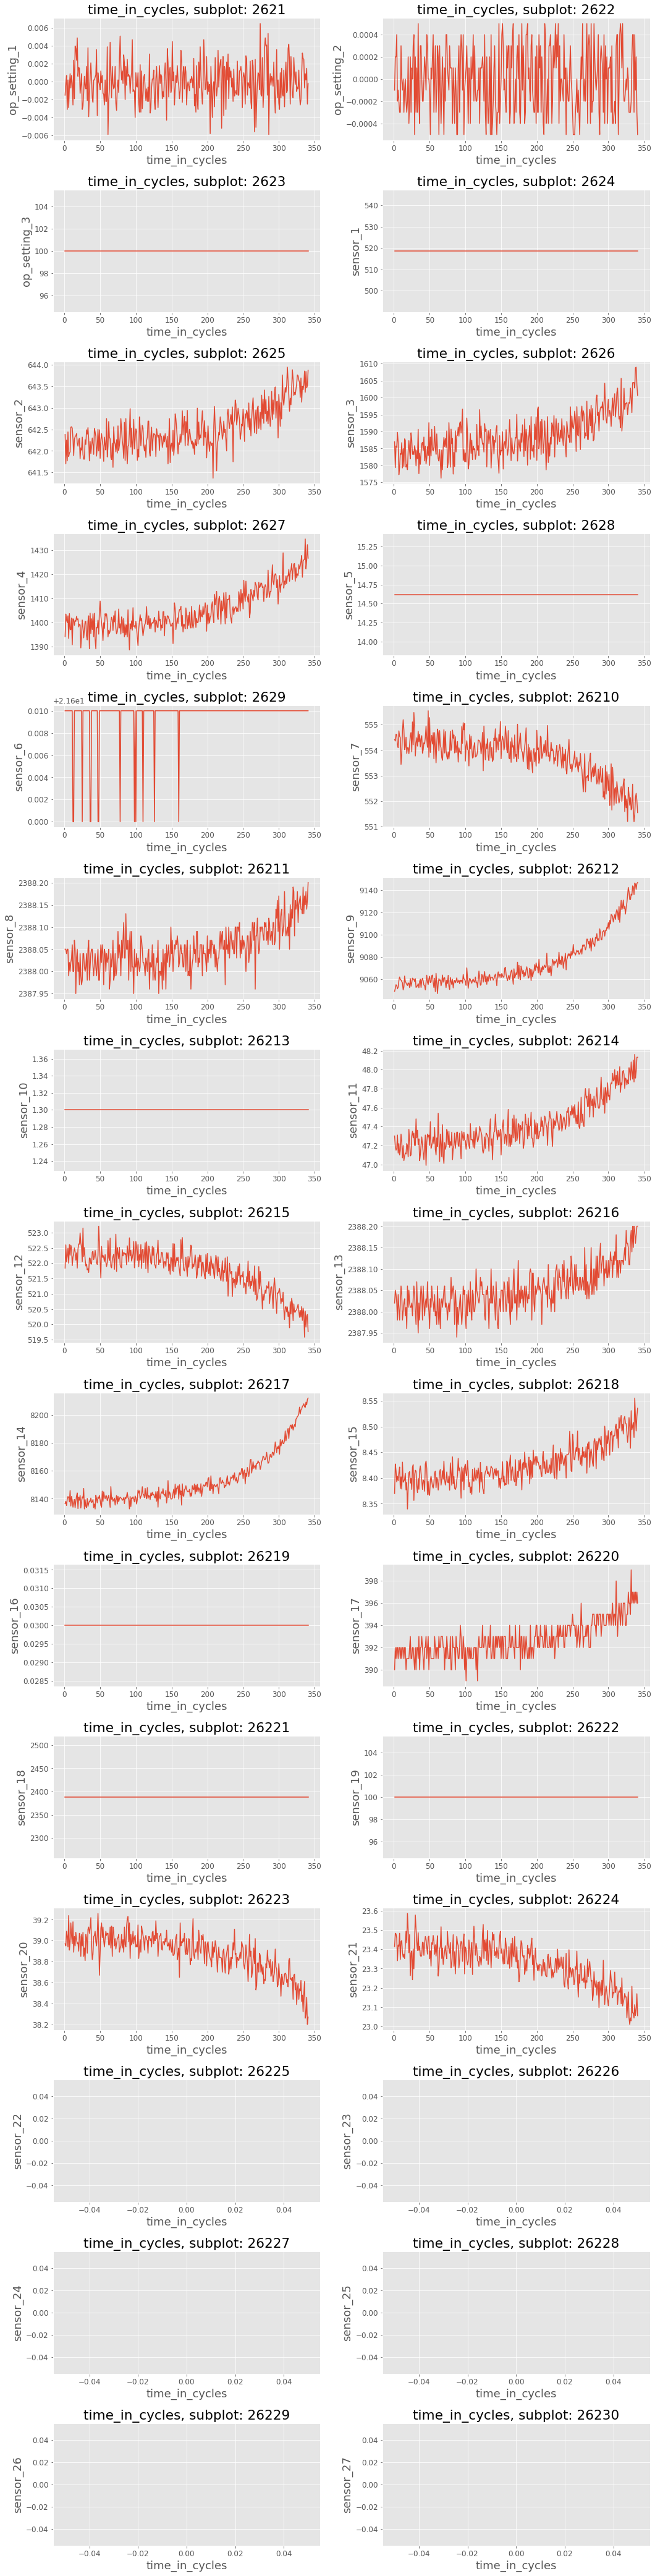

In [125]:
a = 26
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in x_feature:
    for j in y_feature:
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.lineplot(train_data_14[i], train_data_14[j])
        c = c + 1

plt.tight_layout()
plt.show();

In [40]:
data_df_pivot = data_df.pivot_table(index = ['engine_no','time_in_cycles']).reset_index()

In [41]:
data_df_pivot.head()

engine_no  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
0          0               1       25.0074        0.6200          60.0   
1          0               2       35.0072        0.8413         100.0   
2          0               3       25.0053        0.6215          60.0   
3          0               4       42.0045        0.8407         100.0   
4          0               5       35.0046        0.8400         100.0   

   sensor_1  sensor_10  sensor_11  sensor_12  sensor_13  ...  sensor_2  \
0    462.54       0.94      36.70     164.75    2028.38  ...    536.84   
1    449.44       1.03      41.78     183.67    2388.20  ...    555.44   
2    462.54       0.94      36.49     164.49    2028.40  ...    536.42   
3    445.00       1.02      41.78     130.67    2388.13  ...    549.41   
4    449.44       1.03      41.79     183.02    2388.19  ...    555.21   

   sensor_20  sensor_21  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  \
0      14.35     8.4712   1256.52   1043.97      7.05      9.02    175.29   
1      14.88     8.9928   1364.42   1128.75      5.48      8.00    194.71   
2      14.21     8.5107   1265.94   1047.23      7.05      9.03    175.29   
3      10.63     6.4578   1355.52   1115.81      3.91      5.72    138.92   
4      14.95     9.0279   1361.04   1123.63      5.48      8.00    194.91   

   sensor_8  sensor_9  
0   1915.47   8019.94  
1   2223.06   8361.86  
2   1915.49   8021.37  
3   2212.03   8319.14  
4   2223.10   8357.89  

[5 rows x 26 columns]

In [43]:
data_df_pivot_0 = data_df_pivot[data_df_pivot['engine_no']==0]
data_df_pivot_0.head()

engine_no  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
0          0               1       25.0074        0.6200          60.0   
1          0               2       35.0072        0.8413         100.0   
2          0               3       25.0053        0.6215          60.0   
3          0               4       42.0045        0.8407         100.0   
4          0               5       35.0046        0.8400         100.0   

   sensor_1  sensor_10  sensor_11  sensor_12  sensor_13  ...  sensor_2  \
0    462.54       0.94      36.70     164.75    2028.38  ...    536.84   
1    449.44       1.03      41.78     183.67    2388.20  ...    555.44   
2    462.54       0.94      36.49     164.49    2028.40  ...    536.42   
3    445.00       1.02      41.78     130.67    2388.13  ...    549.41   
4    449.44       1.03      41.79     183.02    2388.19  ...    555.21   

   sensor_20  sensor_21  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  \
0      14.35     8.4712   1256.52   1043.97      7.05      9.02    175.29   
1      14.88     8.9928   1364.42   1128.75      5.48      8.00    194.71   
2      14.21     8.5107   1265.94   1047.23      7.05      9.03    175.29   
3      10.63     6.4578   1355.52   1115.81      3.91      5.72    138.92   
4      14.95     9.0279   1361.04   1123.63      5.48      8.00    194.91   

   sensor_8  sensor_9  
0   1915.47   8019.94  
1   2223.06   8361.86  
2   1915.49   8021.37  
3   2212.03   8319.14  
4   2223.10   8357.89  

[5 rows x 26 columns]

In [44]:
x_feature = ['time_in_cycles']
y_feature = data_df_pivot_0.columns[2:].tolist()

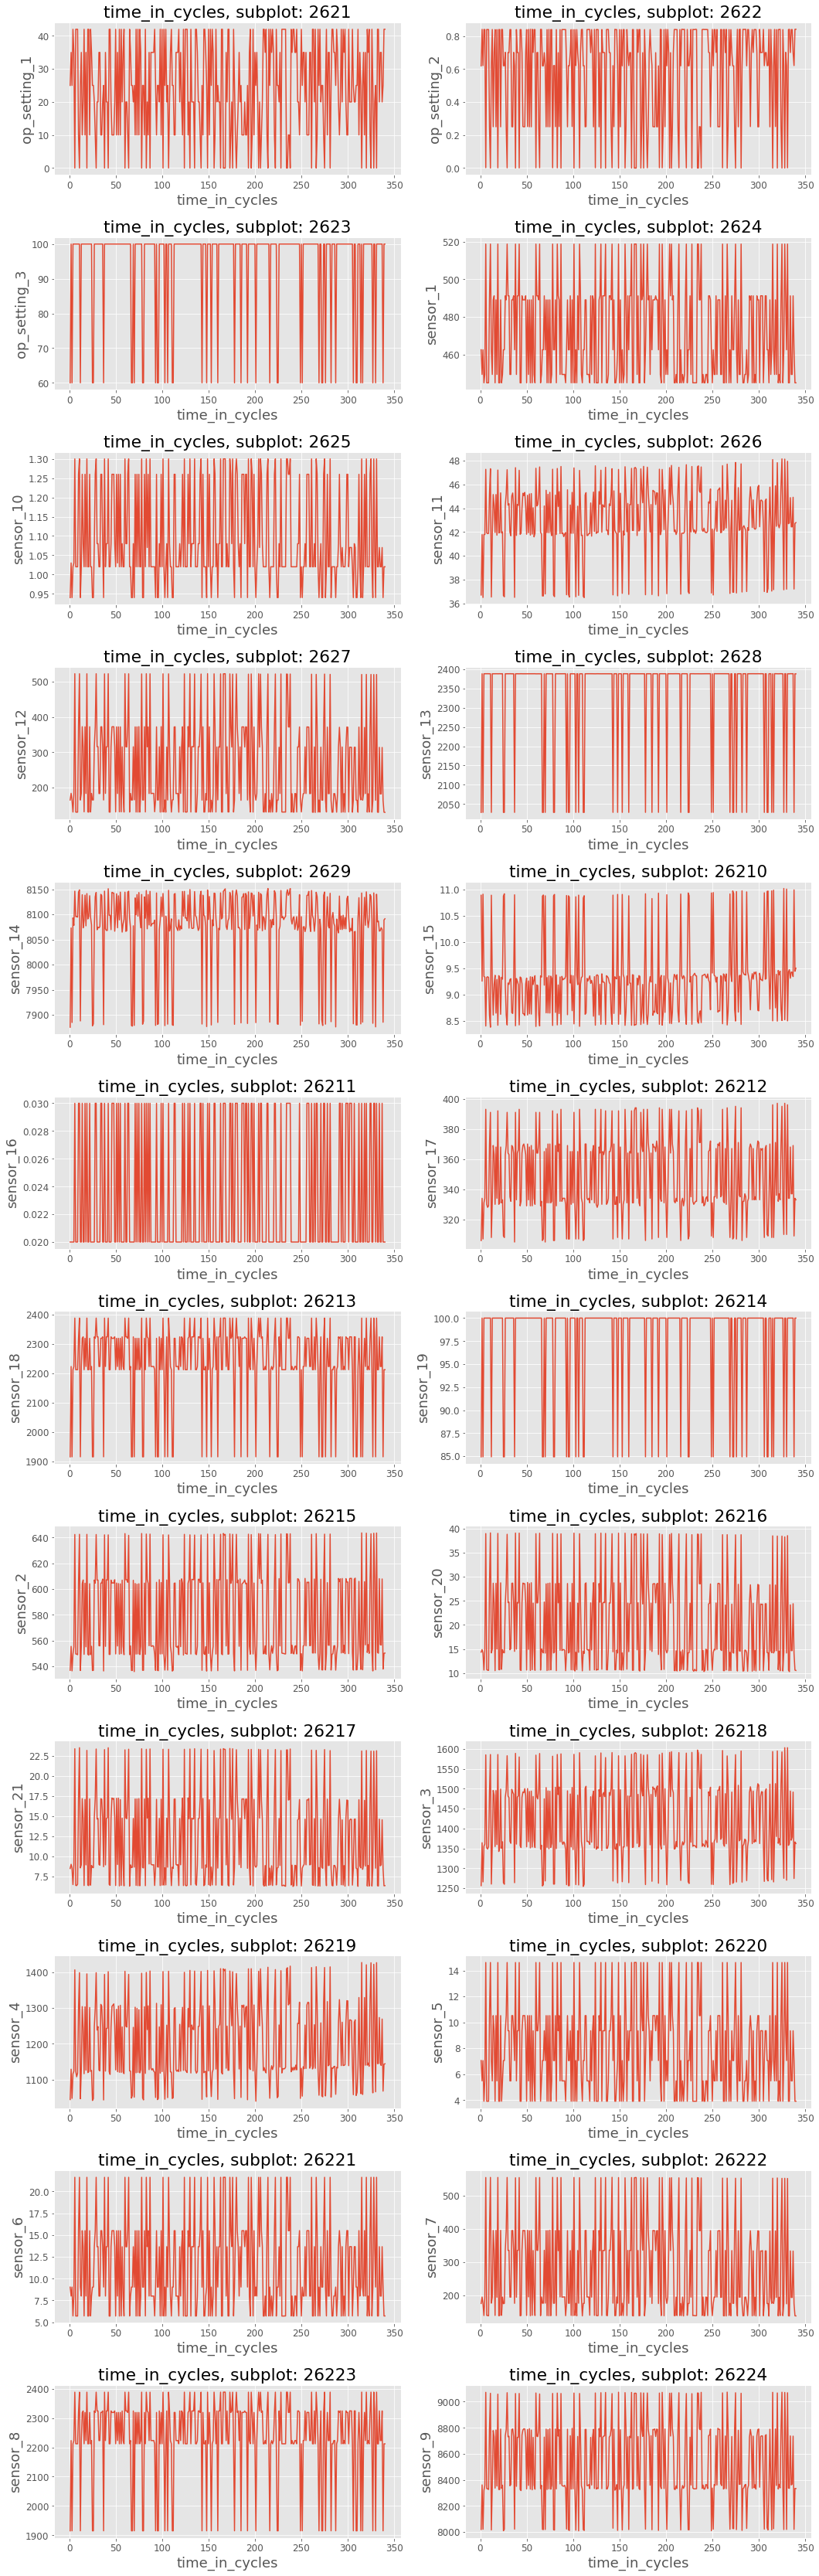

In [45]:
a = 26
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in x_feature:
    for j in y_feature:
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.lineplot(data_df_pivot_0[i], data_df_pivot_0[j])
        c = c + 1

plt.tight_layout()
plt.show();